# Useful librairies

In [1]:
import pandas as pd
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import sys
matplotlib.rcParams["figure.facecolor"] = "white"

# Data Importation

In [2]:
#create a dataframe from the csv file Time_Value_CM.csv 
df = pd.read_csv('Time_Value_CM.csv', names=['Date', 'Value'])
df.head()

,Date,Value
0,2022-05-02T00:01:00Z,178961.742
1,2022-05-02T00:02:00Z,170609.878
2,2022-05-02T00:03:00Z,168829.864
3,2022-05-02T00:04:00Z,173252.734
4,2022-05-02T00:05:00Z,177271.117


# EDA

## Data Overview

In [3]:
#convert the date column to datetime format 
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%dT%H:%M:%SZ")
df.sort_values(by='Date', inplace=True)

In [4]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.dayofweek.astype(int)
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df['Second'] = df['Date'].dt.second

In [5]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second
79143,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0
79144,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0
79145,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0
79146,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0
79147,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0


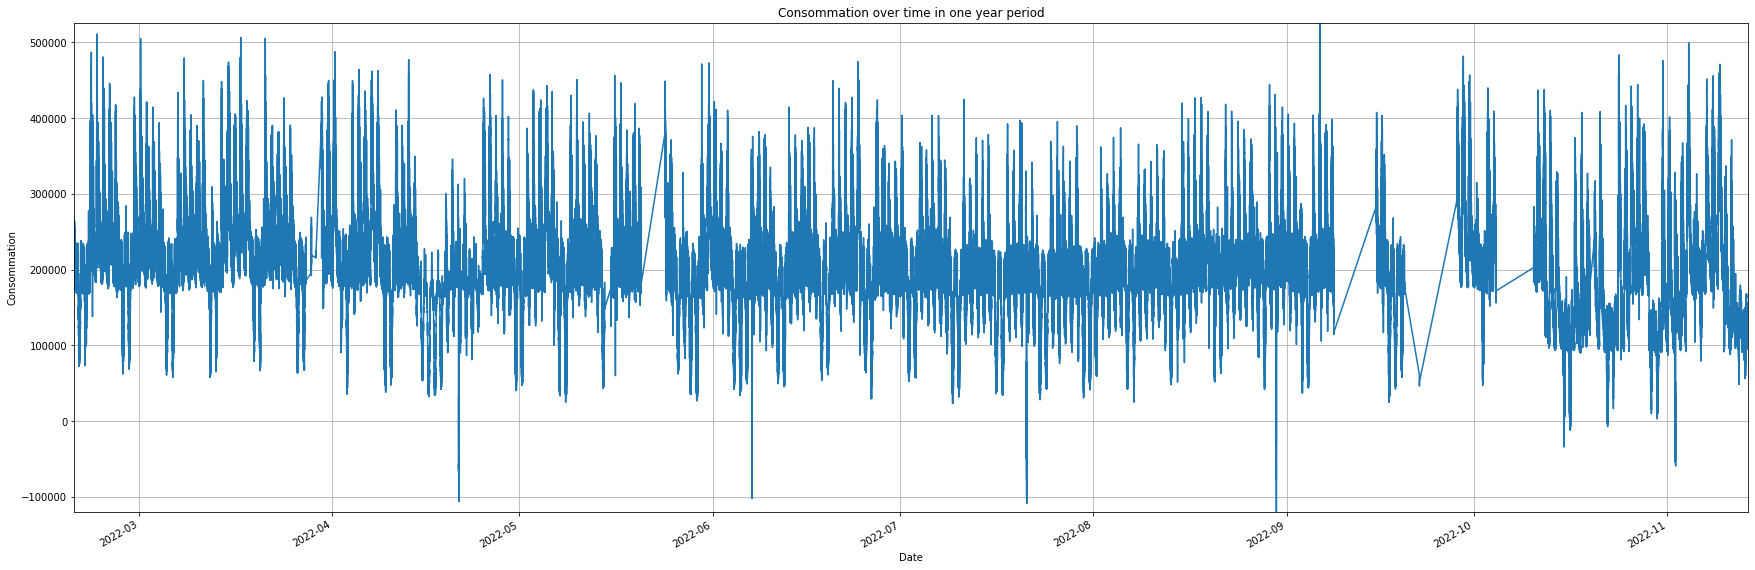

In [6]:
def plot_consommation_over_time_detailed_graph(): 
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time in one year period')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_detailed_graph()

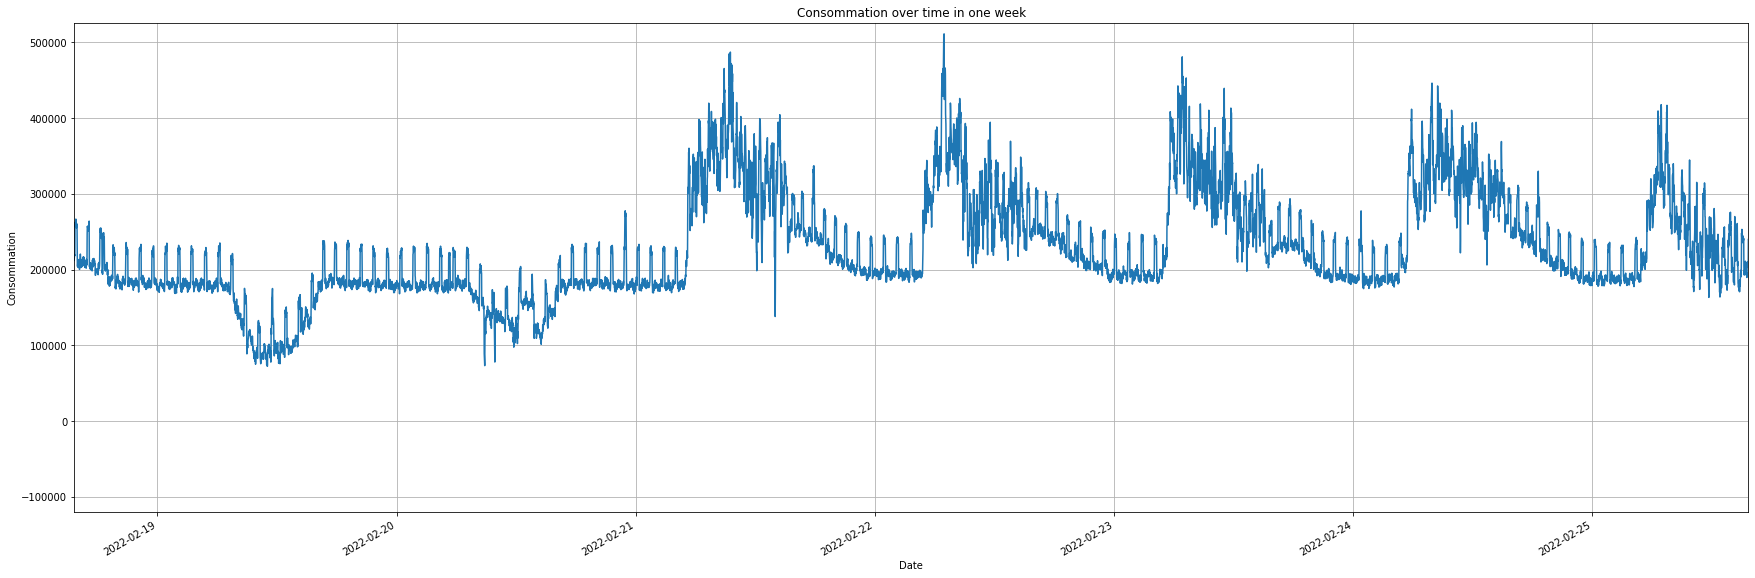

In [7]:
# function to plot the first week 
def plot_consommation_over_time_first_week():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time in one week')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min() + pd.DateOffset(days=7))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_first_week()

Features :
- average powers during intervals in the day
- power differences in the morning
- peak power

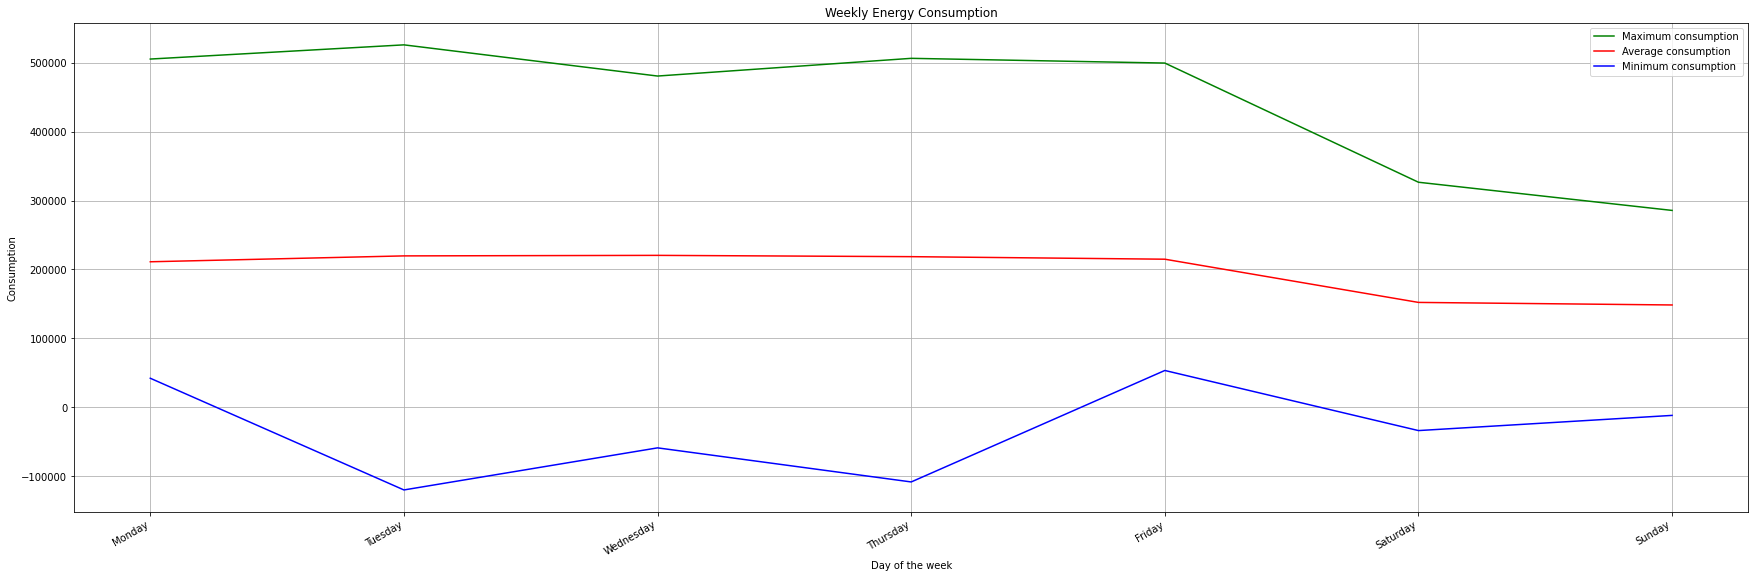

In [8]:
# function to plot the first week 
def plot_weekly_consumption():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Value"].groupby(df["Day_of_week"]).max().index, df["Value"].groupby(df["Day_of_week"]).max().values, color= "g", label= "Maximum consumption")
    ax.plot(df["Value"].groupby(df["Day_of_week"]).mean().index, df["Value"].groupby(df["Day_of_week"]).mean().values, color= "r", label= "Average consumption")
    ax.plot(df["Value"].groupby(df["Day_of_week"]).min().index, df["Value"].groupby(df["Day_of_week"]).min().values, color= "b", label= "Minimum consumption")
    ax.set_title('Weekly Energy Consumption')
    ax.set_xlabel('Day of the week')
    ax.set_ylabel('Consumption')
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    plt.show()

plot_weekly_consumption()

## Weekend vs Weekdays

In [10]:
#add a column to datafame with 1 if it is a weekend day and 0 if it is a weekday
df['Weekend'] = df['Date'].dt.dayofweek.isin([5,6]).astype(int)
df.tail()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Weekend
362000,2022-11-13 23:56:00,97817.538,2022,11,13,6,23,56,0,1
362001,2022-11-13 23:57:00,97344.145,2022,11,13,6,23,57,0,1
362002,2022-11-13 23:58:00,96617.403,2022,11,13,6,23,58,0,1
362003,2022-11-13 23:59:00,96638.174,2022,11,13,6,23,59,0,1
362004,2022-11-14 00:00:00,99724.063,2022,11,14,0,0,0,0,0


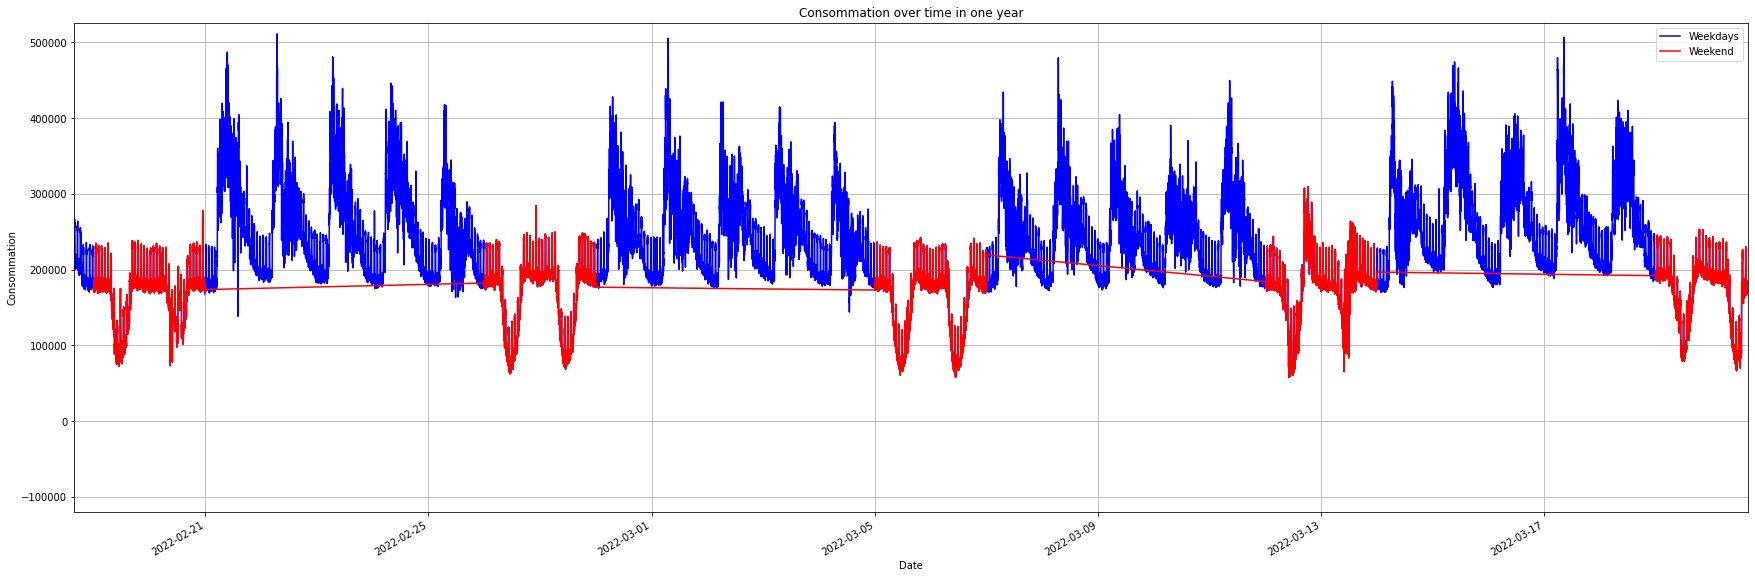

In [11]:
#function to plot the value with another color for the weekend days 
def plot_consommation_over_time_weekend():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Weekdays")
    ax.plot(df[df['Weekend'] == 1]['Date'], df[df['Weekend'] == 1]['Value'], color='red', label= "Weekend")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min() + pd.Timedelta(days=30))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    ax.legend()
    plt.show()
plot_consommation_over_time_weekend()

- Need to know how much PV on CM rooftop 
- make a ghi feature which correlates in the power variation
- ghi is linked with the temperature 
- https://gate.meteoswiss.ch/idaweb/prepareRegistration.do : Select Lausanne, the day

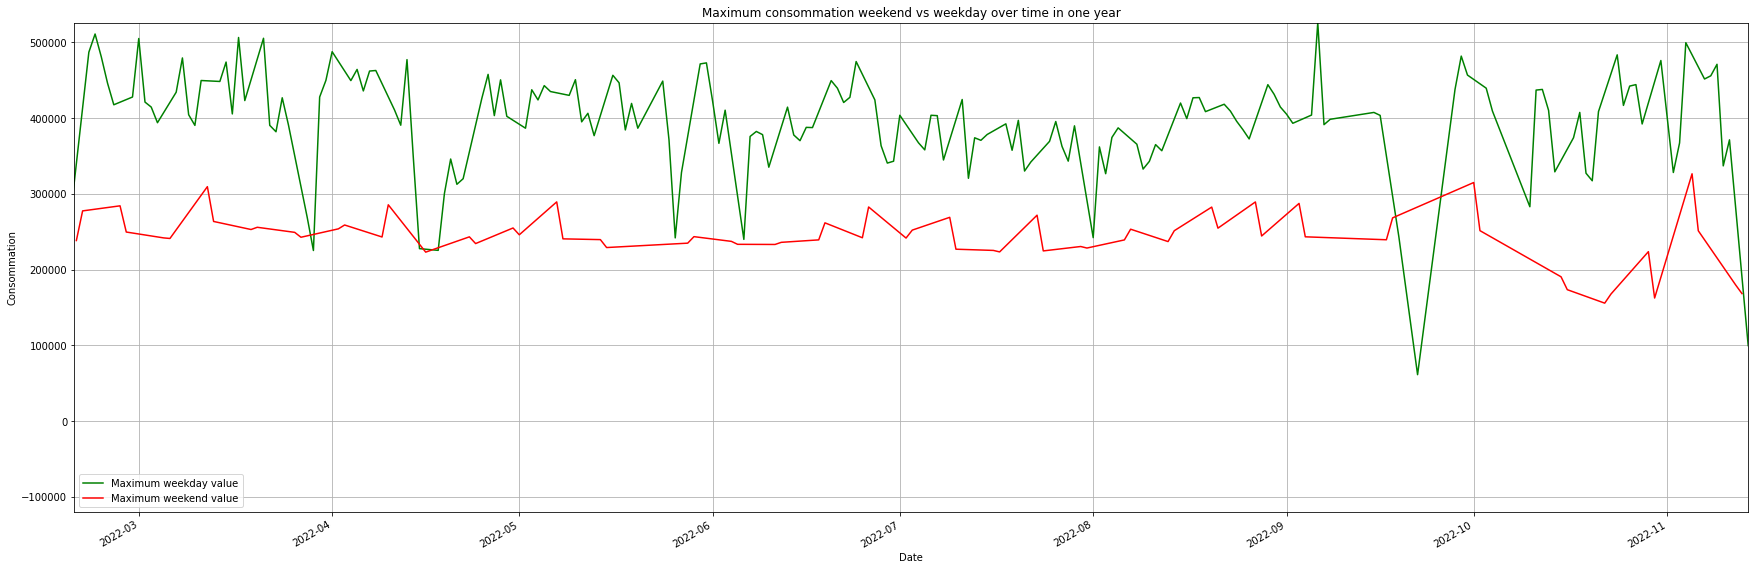

In [13]:
def plot_consommation_over_time_weekend_vs_weekday():
    fig, ax = plt.subplots(figsize=(30, 10))
    #ax.plot(df['Date'], df['Value'], color='blue')
    #ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red')
    ax.plot(df[df['Weekend'] == 0].groupby(df['Date'].dt.date)['Value'].max(), color='green', label="Maximum weekday value")
    ax.plot(df[df['Weekend'] == 1].groupby(df['Date'].dt.date)['Value'].max(), color='red', label="Maximum weekend value")
    ax.set_title('Maximum consommation weekend vs weekday over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_weekend_vs_weekday()

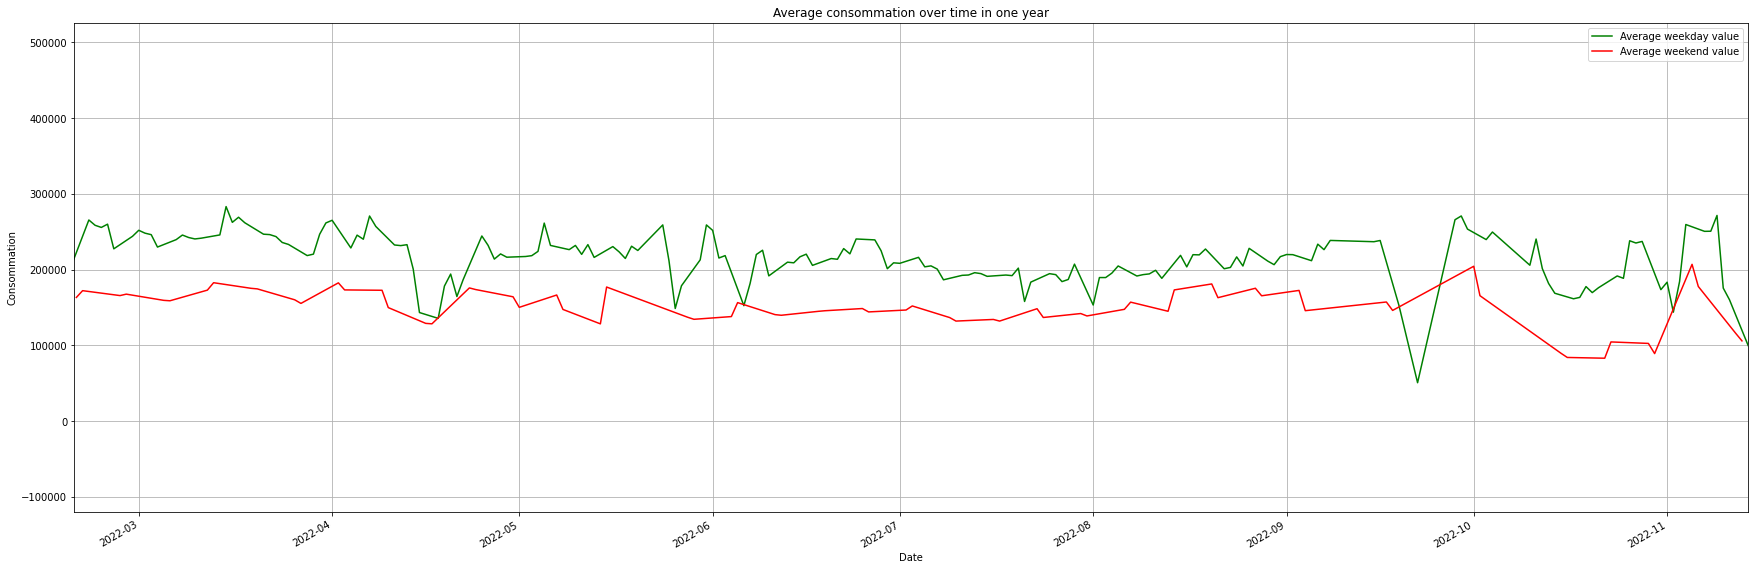

In [139]:
def plot_consommation_over_time_winter_peak():
    fig, ax = plt.subplots(figsize=(30, 10))
    #ax.plot(df['Date'], df['Value'], color='blue')
    #ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red')
    ax.plot(df[df['Weekend'] == 0].groupby(df['Date'].dt.date)['Value'].mean(), color='green', label="Average weekday value")
    ax.plot(df[df['Weekend'] == 1].groupby(df['Date'].dt.date)['Value'].mean(), color='red', label="Average weekend value")
    ax.set_title('Average consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_winter_peak()

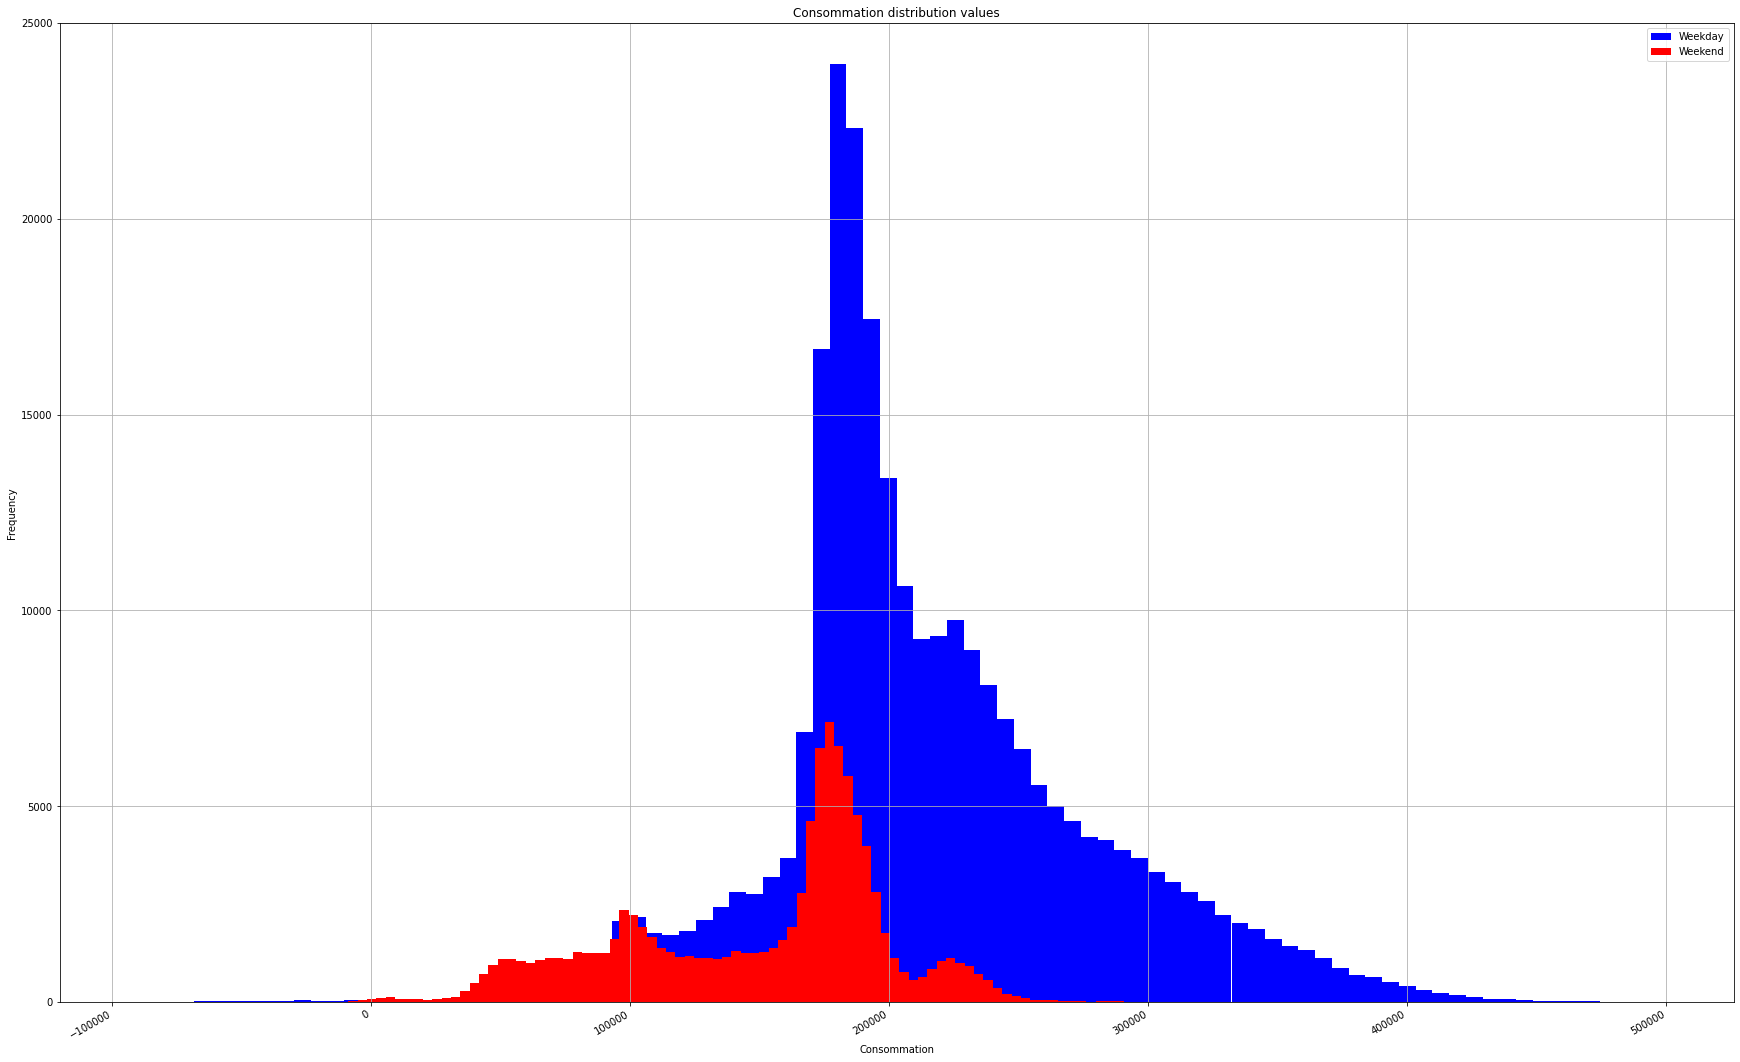

In [140]:
def plot_consommation_over_time_weekend_distribution():
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.hist(df[df['Weekend'] == 0]['Value'], bins=100, color='blue', label= "Weekday")
    ax.hist(df[df['Weekend'] == 1]['Value'], bins=100, color='red', label= "Weekend")
    ax.set_title('Consommation distribution values')
    ax.set_xlabel('Consommation')
    ax.set_ylabel('Frequency')
    ax.set_xlim(df['Value'].min(), df['Value'].max())
    ax.set_ylim(0, 25000)
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_weekend_distribution()

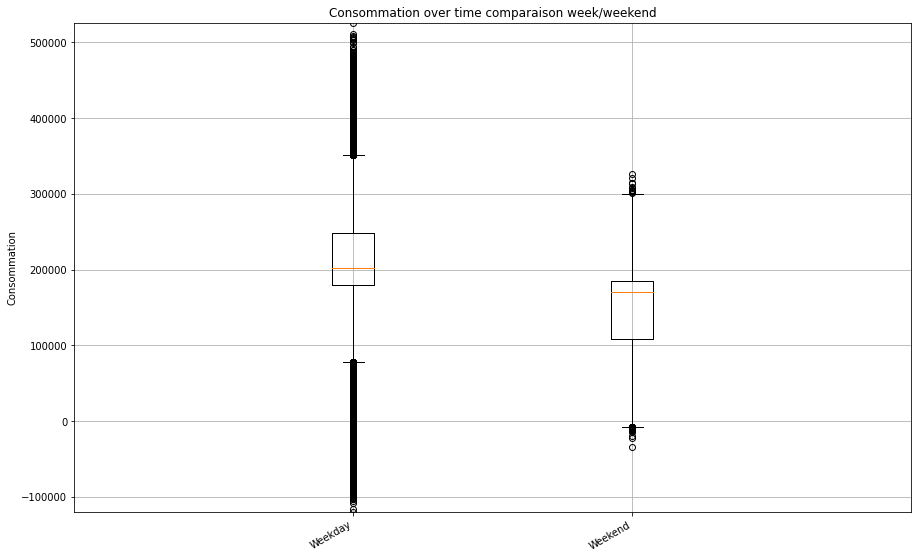

In [141]:
def plot_consommation_over_time_weekend_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df['Weekend'] == 0]['Value'], df[df['Weekend'] == 1]['Value']])
    ax.set_title('Consommation over time comparaison week/weekend')
    ax.set_ylabel('Consommation')
    ax.set_xlim(0, 3)
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    plt.xticks([1, 2], ['Weekday', 'Weekend'])
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_weekend_boxplot()

## Winter vs Summer

In [14]:
# winter 1 and summer 0
df['Winter'] = df['Date'].dt.month.isin([11,12,1,2,3]).astype(int)
df.tail()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Weekend,Winter
362000,2022-11-13 23:56:00,97817.538,2022,11,13,6,23,56,0,1,1
362001,2022-11-13 23:57:00,97344.145,2022,11,13,6,23,57,0,1,1
362002,2022-11-13 23:58:00,96617.403,2022,11,13,6,23,58,0,1,1
362003,2022-11-13 23:59:00,96638.174,2022,11,13,6,23,59,0,1,1
362004,2022-11-14 00:00:00,99724.063,2022,11,14,0,0,0,0,0,1


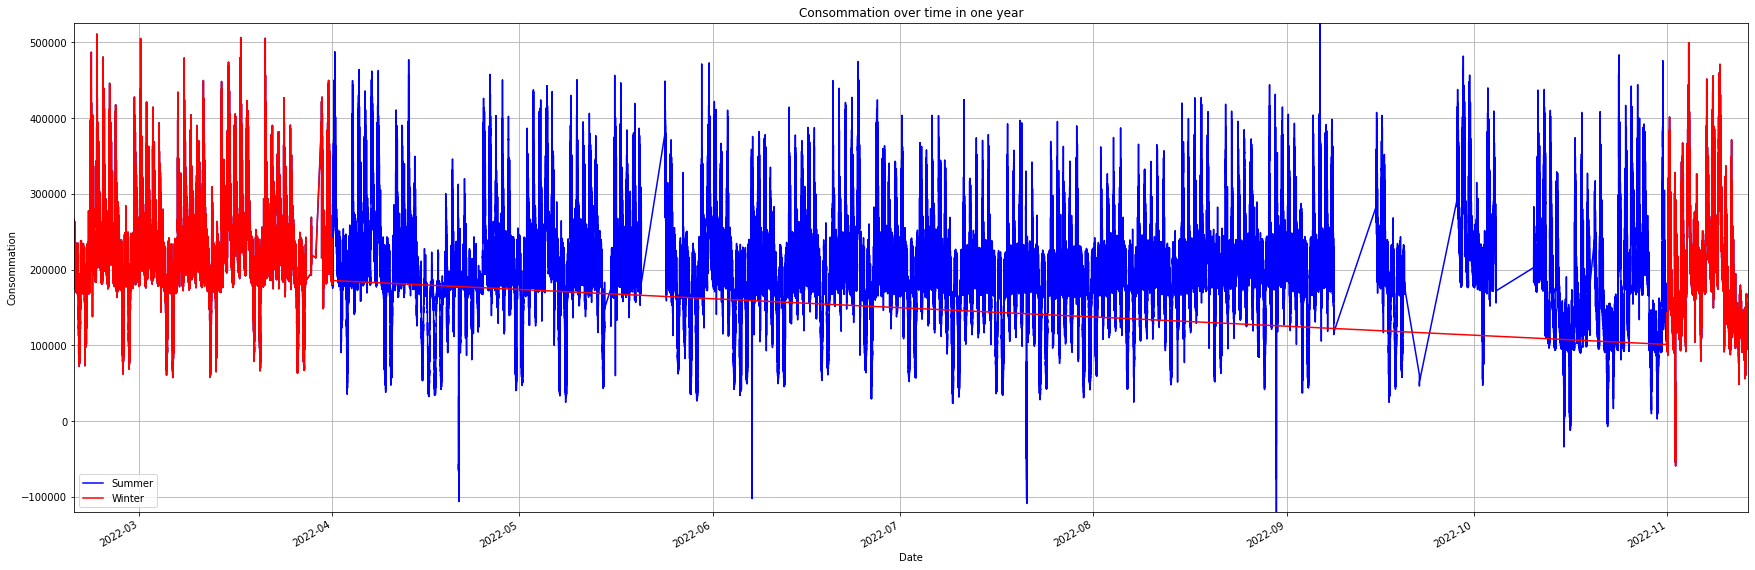

In [15]:
#plot the value with another color for the winter days
def plot_consommation_over_time_winter():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Summer")
    ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red', label= "Winter")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_winter()

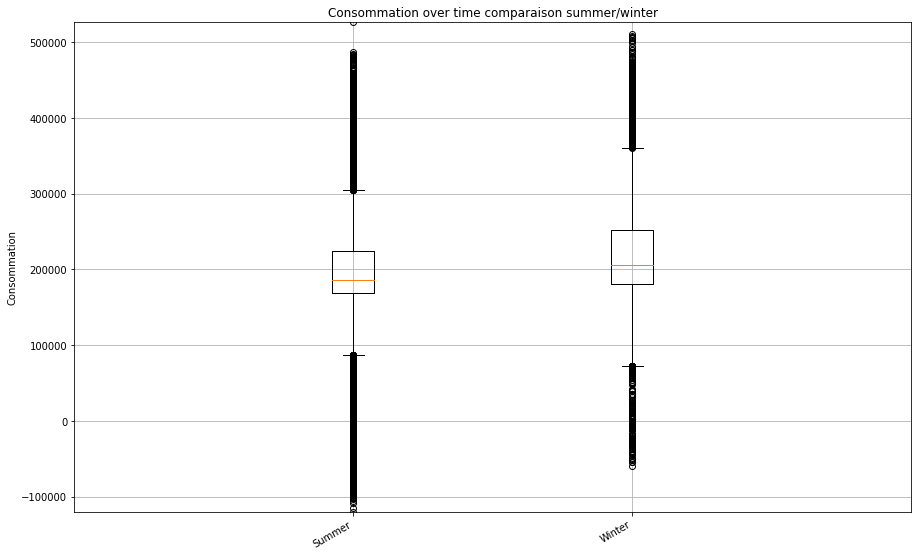

In [16]:
def plot_consommation_over_time_winter_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df['Winter'] == 0]['Value'], df[df['Winter'] == 1]['Value']])
    ax.set_title('Consommation over time comparaison summer/winter')
    ax.set_ylabel('Consommation')
    ax.set_xlim(0, 3)
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    plt.xticks([1, 2], ['Summer', 'Winter'])
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_winter_boxplot()

- Train network with temperature input to predict the day ahead

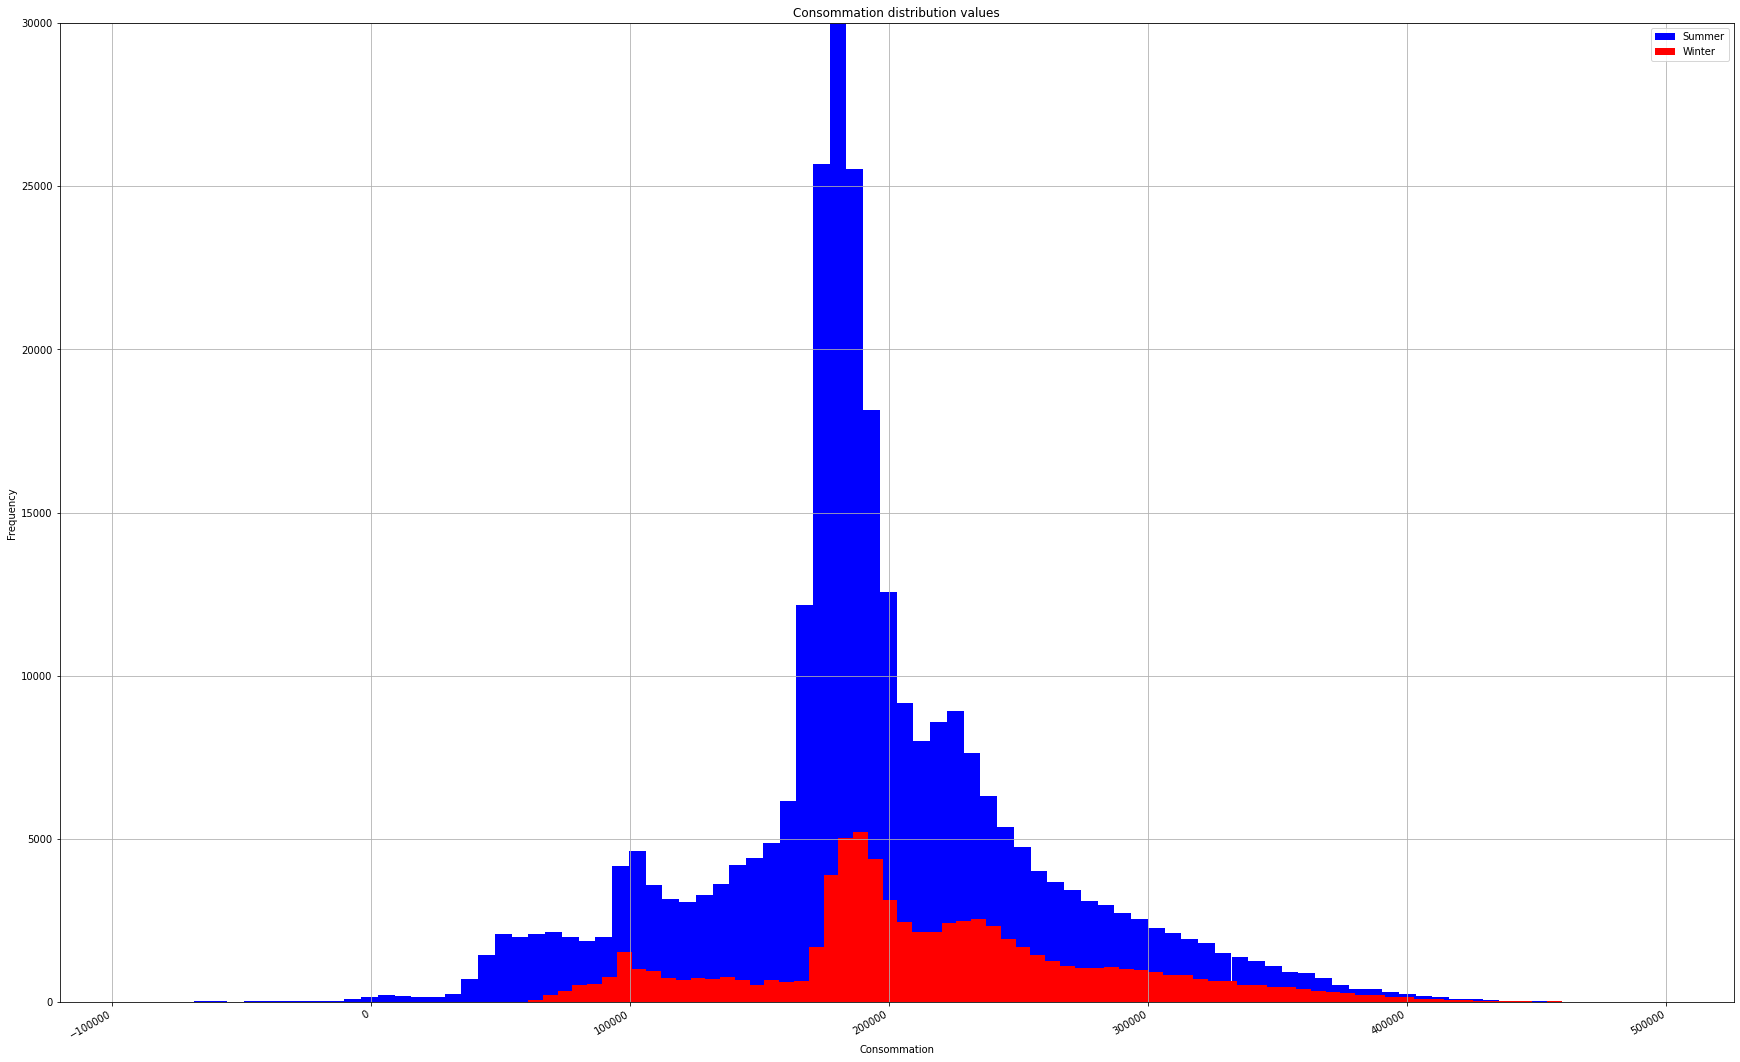

In [17]:
def plot_consommation_over_time_winter_distribution():
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.hist(df[df['Winter'] == 0]['Value'], bins=100, color='blue', label= "Summer")
    ax.hist(df[df['Winter'] == 1]['Value'], bins=100, color='red', label= "Winter")
    ax.set_title('Consommation distribution values')
    ax.set_xlabel('Consommation')
    ax.set_ylabel('Frequency')
    ax.set_xlim(df['Value'].min(), df['Value'].max())
    ax.set_ylim(0, 30000)
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_winter_distribution()

## Working hours vs Free hours

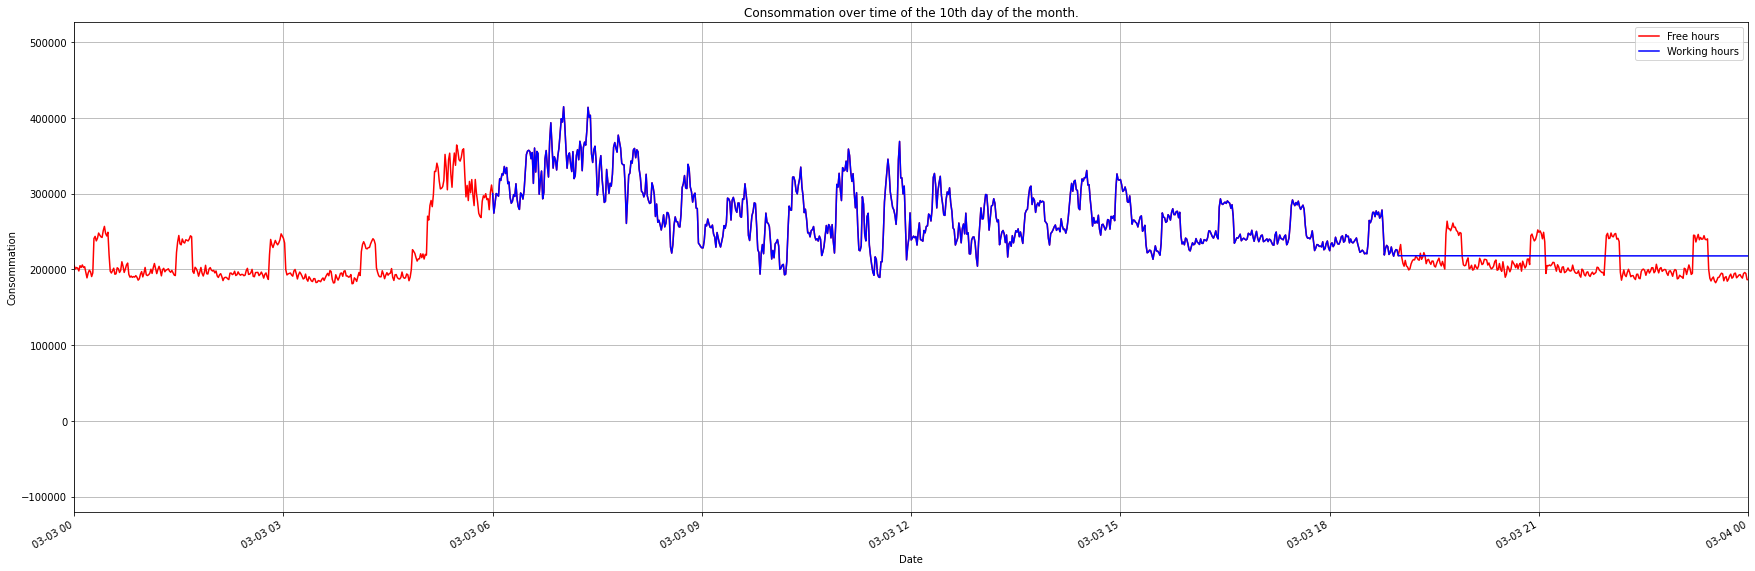

In [18]:
#function to plot the value for a chosen day that is a parameter

def plot_consommation_over_time_day(day):
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot( df[df['Date'].dt.day == day]['Date'], df[df['Date'].dt.day == day]['Value'], color='red', label= "Free hours")
    ax.plot( df[(df['Date'].dt.day == day) & (df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 19)]['Date'], df[(df['Date'].dt.day == day) & (df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 19)]['Value'], color='blue', label= "Working hours")
    ax.set_title("Consommation over time of the 10th day of the month.")
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df[df['Date'].dt.day == day]['Date'].min(), df[df['Date'].dt.day == day]['Date'].min() + pd.Timedelta(days=1))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_day(3)

In [19]:
df['Working hour'] = ((df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 15)).astype(int)
df['Transition morning'] = ((df['Date'].dt.hour >= 4) & (df['Date'].dt.hour < 6)).astype(int)
df['Transition evening'] = ((df['Date'].dt.hour >= 15) & (df['Date'].dt.hour < 19)).astype(int)

# Data Normalization

In [20]:
#drop values after 2022-09-10
df = df[df['Date'] < '2022-09-10']

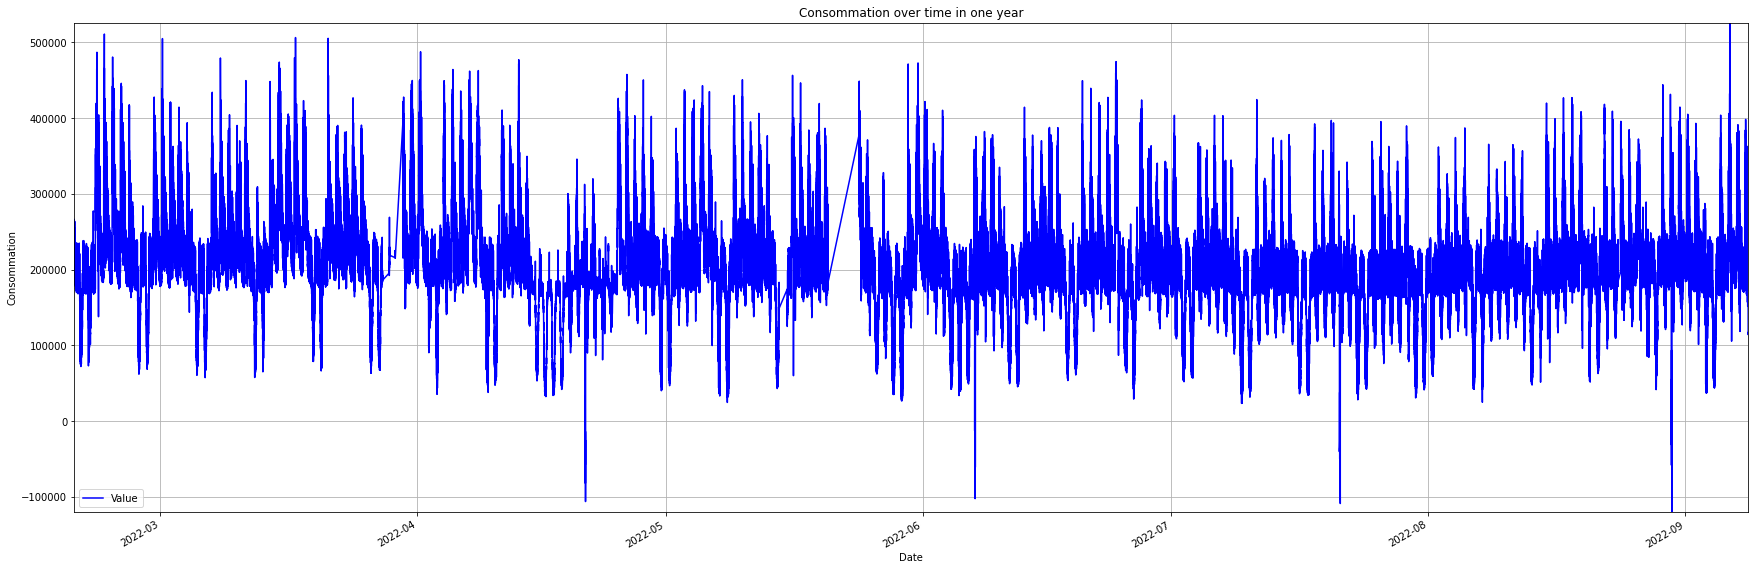

In [21]:
#plot value over time
def plot_consommation_over_time():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Value")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time()

In [22]:
#add a column holiday 1 between 2022-04-20 and 2022-04-28 0 otherwise
df['Holiday'] = ((df['Date'] >= '2022-04-15') & (df['Date'] <= '2022-04-23')).astype(int)

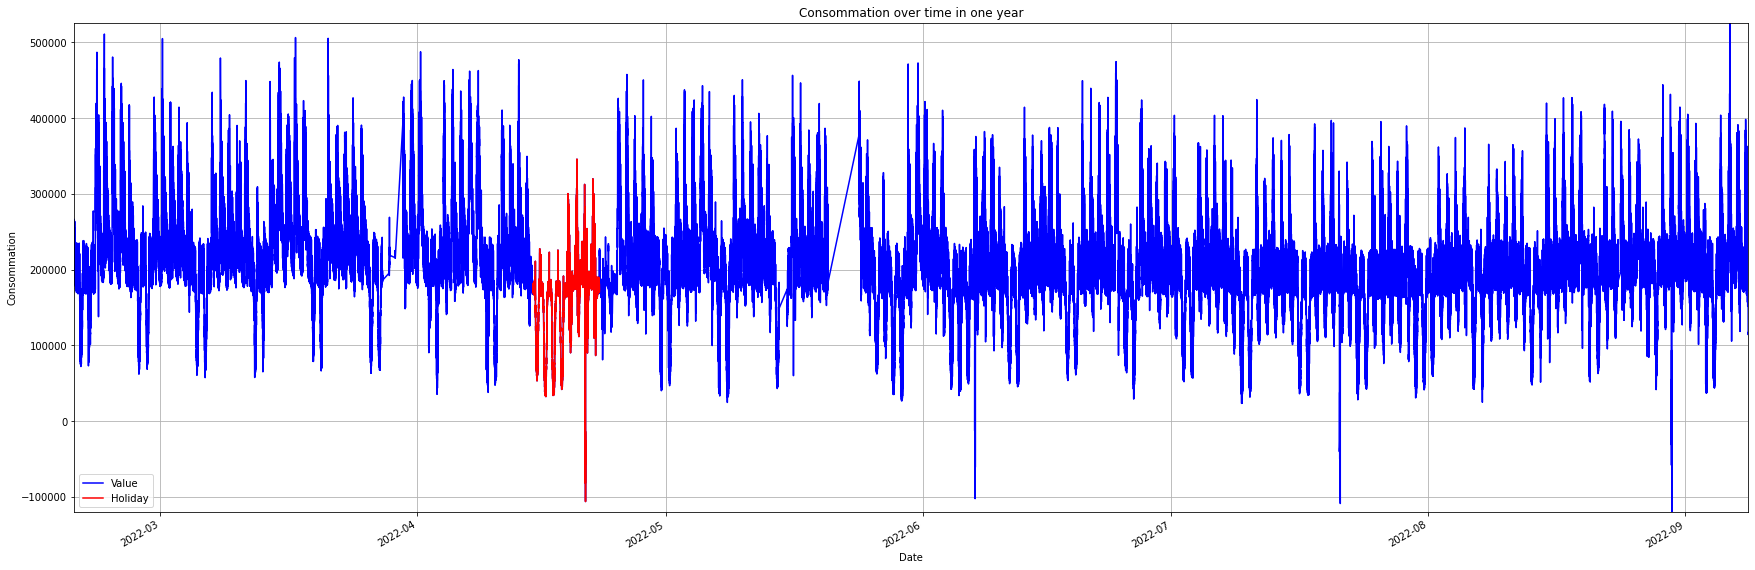

In [23]:
#plot value over time with holidays in anotehr color
def plot_consommation_over_time_holiday():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Value")
    ax.plot(df[df['Holiday'] == 1]['Date'], df[df['Holiday'] == 1]['Value'], color='red', label= "Holiday")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_holiday()

In [24]:
df['Mean'] = df['Value'].mean()
df['Variance'] = df['Value'].var()
df['Normalized'] = (df['Value'] - df['Mean']) / df['Variance']

In [26]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Weekend,Winter,Working hour,Transition morning,Transition evening,Holiday,Mean,Variance,Normalized
79143,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0,0,1,0,0,1,0,200768.617976,3.858186e+09,0.000003
79144,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0,0,1,0,0,1,0,200768.617976,3.858186e+09,0.000004
79145,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0,0,1,0,0,1,0,200768.617976,3.858186e+09,0.000005
79146,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0,0,1,0,0,1,0,200768.617976,3.858186e+09,0.000004
79147,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0,0,1,0,0,1,0,200768.617976,3.858186e+09,0.000005


# Pattern


In [155]:
# df['Peak'] = 0

# #iterate over all the values of the data_frame and every 3600 rows 
# j=0
# k=0
# for i in range(79155, 79155+len(df)):
#     j=j+1
#     if j>67:
#         k=k+1
#         if k != 0:
#             df.loc[i, 'Peak'] = 1
#             if k==12:
#                 k=0
#                 j=0

In [27]:
df['Peak']=0
# normalize value 
#df['Normalized'] = (df['Value'] - df['Mean']) / df['Variance']

#if normalized value is greater than 0.3 but smaller than 1, it is a peak
df.loc[(df['Normalized'] > 0.000005) & (df['Normalized'] < 0.000015), 'Peak'] = 1



In [28]:
df.head(60)

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Weekend,Winter,Working hour,Transition morning,Transition evening,Holiday,Mean,Variance,Normalized,Peak
79143,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0,0,1,0,0,1,0,200768.617976,3.858186e+09,2.947765e-06,0
79144,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0,0,1,0,0,1,0,200768.617976,3.858186e+09,4.201974e-06,0
79145,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0,0,1,0,0,1,0,200768.617976,3.858186e+09,4.907506e-06,0
79146,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0,0,1,0,0,1,0,200768.617976,3.858186e+09,4.466955e-06,0
79147,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0,0,1,0,0,1,0,200768.617976,3.858186e+09,4.820437e-06,0
79148,2022-02-18 15:44:00,262424.641,2022,2,18,4,15,44,0,0,1,0,0,1,0,200768.617976,3.858186e+09,1.598057e-05,0
79149,2022-02-18 15:45:00,261887.002,2022,2,18,4,15,45,0,0,1,0,0,1,0,200768.617976,3.858186e+09,1.584122e-05,0
79150,2022-02-18 15:46:00,259120.564,2022,2,18,4,15,46,0,0,1,0,0,1,0,200768.617976,3.858186e+09,1.512419e-05,0
79151,2022-02-18 15:47:00,256657.071,2022,2,18,4,15,47,0,0,1,0,0,1,0,200768.617976,3.858186e+09,1.448568e-05,1
79152,2022-02-18 15:48:00,260196.285,2022,2,18,4,15,48,0,0,1,0,0,1,0,200768.617976,3.858186e+09,1.540301e-05,0


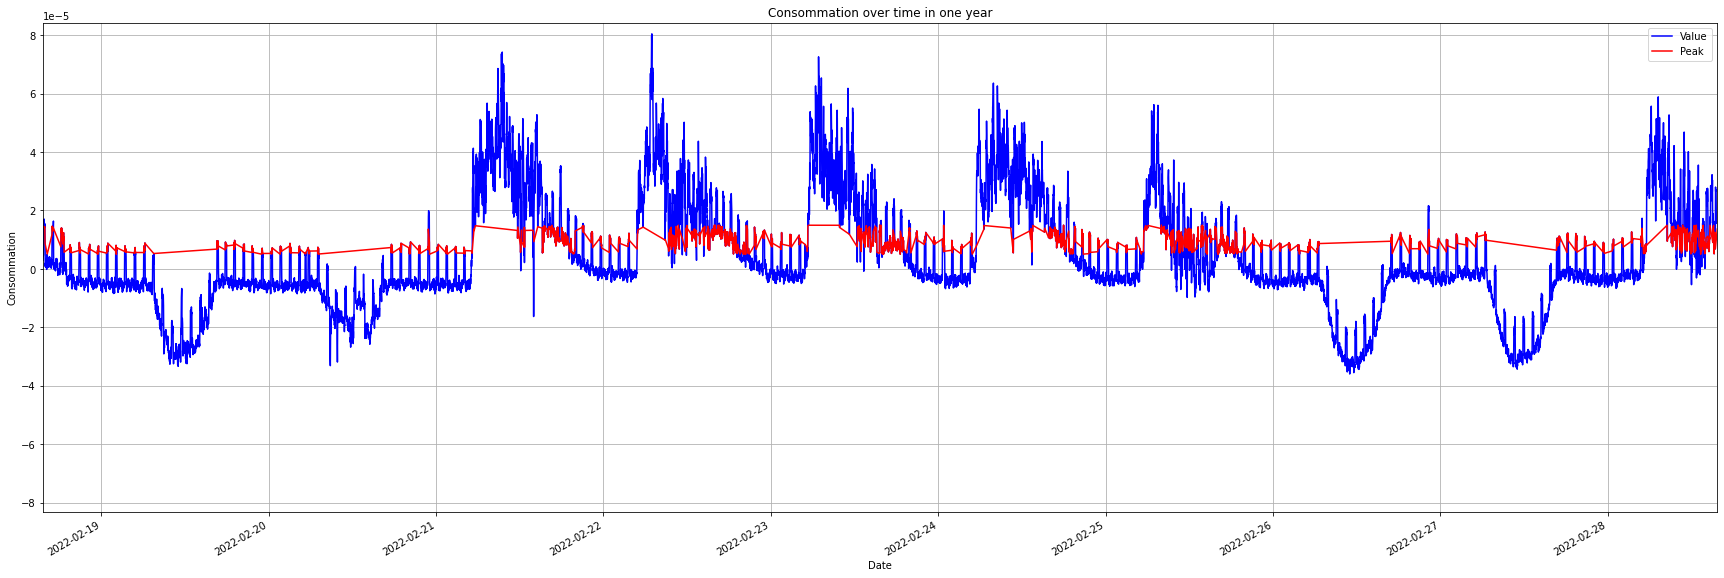

In [29]:
#plot the value with another color for the peak values
def plot_consommation_over_time_peak():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Normalized'], color='blue', label= "Value")
    ax.plot(df[df['Peak'] == 1]['Date'], df[df['Peak'] == 1]['Normalized'], color='red', label= "Peak")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min()+ pd.Timedelta(days=10))
    ax.set_ylim(df['Normalized'].min(), df['Normalized'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_peak()


# Generate Cycle for Dates

In [30]:
def generate_cycle(array, nb_div):
    re_part = np.ones(len(array))
    im_part = np.ones(len(array))

    for k in range(len(array)):
        z = np.exp(array[k]*2j*np.pi/nb_div)
        re_part[k] = np.real(z)
        im_part[k] = np.imag(z)

    return re_part, im_part

In [31]:
def plot_cycle(re_part, im_part, title):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.plot(re_part, im_part, '+')
    ax.set_title(title)
    ax.set_xlabel('Real Part')
    ax.set_ylabel('Imaginary Part')
    ax.grid(True)
    plt.show()

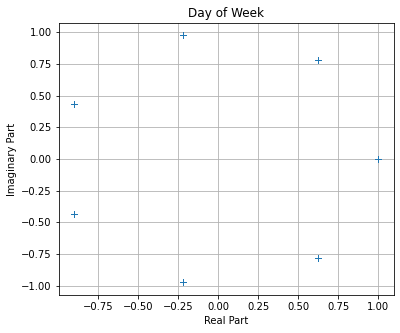

In [32]:
day_of_week_re, day_of_week_im = generate_cycle(df['Day_of_week'].to_numpy(), 7)
plot_cycle(day_of_week_re, day_of_week_im, 'Day of Week')

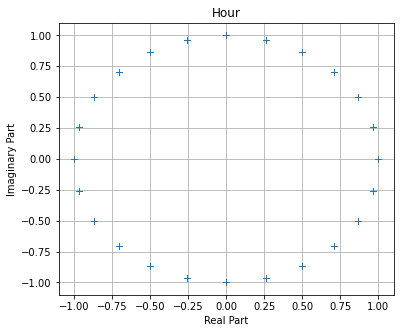

In [33]:
hour_re, hour_im = generate_cycle(df['Hour'].to_numpy(), 24)
plot_cycle(hour_re, hour_im, 'Hour')

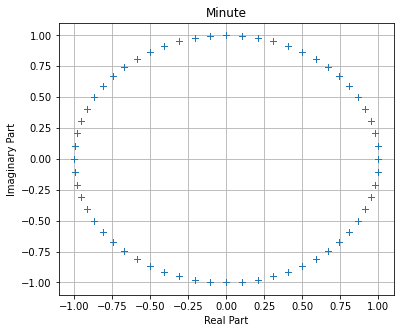

In [34]:
minute_re, minute_im = generate_cycle(df['Minute'].to_numpy(), 60)
plot_cycle(minute_re, minute_im, 'Minute')

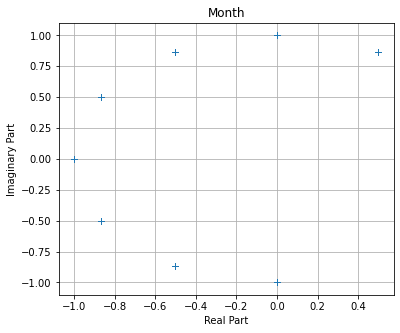

In [35]:
month_re, month_im = generate_cycle(df['Month'].to_numpy(), 12)
plot_cycle(month_re, month_im, 'Month')

In [36]:
def generate_cycle_days(days, months, year):
    re_part = np.ones(len(days))
    im_part = np.ones(len(days))

    lst_31 = [1, 3, 5, 7, 8, 10, 12] # Months with 31 days
    lst_30 = [4, 6, 9, 11] # Months with 30 days

    for k in range(len(days)):
        if months[k] in lst_31:
            nb_div = 31
        elif months[k] in lst_30:
            nb_div = 30
        elif months[k] == 2:
            if (year[k]%4==0 and year[k]%100!=0 or year[k]%400==0):
                nb_div = 29
            else:
                nb_div = 29
        else: 
            print('Error in Months')
            break

        z = np.exp(days[k]*2j*np.pi/nb_div)
        re_part[k] = np.real(z)
        im_part[k] = np.imag(z)

    return re_part, im_part

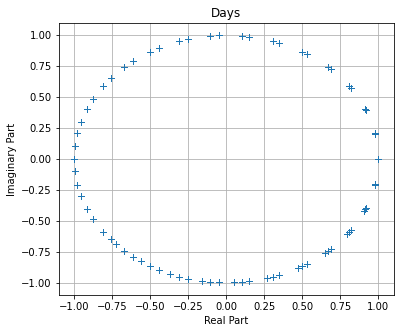

In [37]:
days_re, days_im = generate_cycle_days(df['Day'].to_numpy(), df['Month'].to_numpy(), df['Year'].to_numpy())
plot_cycle(days_re, days_im, 'Days')

In [38]:
param = list(set(list(df.columns)) - set(['Mean', 'Variance', 'Second', 'Year', 'Normalized']))
new_df = df[param]
new_df = new_df.assign(Day_of_Week_re=day_of_week_re.tolist())
new_df = new_df.assign(Day_of_Week_im=day_of_week_im.tolist())
new_df = new_df.assign(Hour_re=hour_re.tolist())
new_df = new_df.assign(Hour_im=hour_im.tolist())
new_df = new_df.assign(Minute_re=minute_re.tolist())
new_df = new_df.assign(Minute_im=minute_im.tolist())
new_df = new_df.assign(Month_re=month_re.tolist())
new_df = new_df.assign(Month_im=month_im.tolist())
new_df = new_df.assign(Day_re=days_re.tolist())
new_df = new_df.assign(Day_im=days_im.tolist())

new_df['Day_of_week']= new_df['Day_of_week']/7


new_df.head()

,Transition morning,Month,Peak,Working hour,Winter,Day,Value,Weekend,Minute,Holiday,...,Day_of_Week_re,Day_of_Week_im,Hour_re,Hour_im,Minute_re,Minute_im,Month_re,Month_im,Day_re,Day_im
79143,0,2,0,0,1,18,212141.645,0,39,0,...,-0.900969,-0.433884,-0.707107,-0.707107,-0.587785,-0.809017,0.5,0.866025,-0.725995,-0.687699
79144,0,2,0,0,1,18,216980.618,0,40,0,...,-0.900969,-0.433884,-0.707107,-0.707107,-0.500000,-0.866025,0.5,0.866025,-0.725995,-0.687699
79145,0,2,0,0,1,18,219702.692,0,41,0,...,-0.900969,-0.433884,-0.707107,-0.707107,-0.406737,-0.913545,0.5,0.866025,-0.725995,-0.687699
79146,0,2,0,0,1,18,218002.962,0,42,0,...,-0.900969,-0.433884,-0.707107,-0.707107,-0.309017,-0.951057,0.5,0.866025,-0.725995,-0.687699
79147,0,2,0,0,1,18,219366.764,0,43,0,...,-0.900969,-0.433884,-0.707107,-0.707107,-0.207912,-0.978148,0.5,0.866025,-0.725995,-0.687699


# Add mean of values

# Add GHI

# Modeling

In [69]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

In [70]:
target_column = ['Value']
predictors = list(set(list(new_df.columns)) - set(target_column))


X = new_df[predictors]
y = new_df[target_column]
# Split into 70% train and 30% test not random to keep the time order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [71]:
#create new datafram X_train and X-test without column date
X_train_ = X_train.drop(['Date'], axis=1)
X_test_ = X_test.drop(['Date'], axis=1)
X_train_.shape

(238718, 22)

In [72]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_ = scaler.fit_transform(X_train_)
X_test_ = scaler.transform(X_test_)


In [79]:
def create_model():
    model = Sequential()
    model.add(LSTM(units=128, input_shape = (X_train_.shape[1], 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.compile(loss='mse', optimizer='adam')
    return model

In [80]:
# create model
model = create_model()

# fit model
model.fit(X_train_, y_train, epochs=10, batch_size=1, verbose=1)



Epoch 1/10
 31299/238718 [==>...........................] - ETA: 28:09 - loss: 44819501056.0000

In [ ]:
# evaluate model
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, sqrt(trainScore)))
testScore = model.evaluate(X_test_, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, sqrt(testScore)))